### Background information and Problem statement

 Shoppers rely on Home Depot’s product authority to find and buy the latest products and to get timely solutions to their home improvement needs. From installing a new ceiling fan to remodeling an entire kitchen, with the click of a mouse or tap of the screen, customers expect the correct results to their queries – quickly. Speed, accuracy and delivering a frictionless customer experience are essential.

In this project, I will try to build a recommendation system model from  Home Depot's data to help them improve their customers' experience by accurately predicting their relevance of search results.

Search relevancy is an implicit measure Home Depot uses to gauge how quickly they can get customers to the right products. At time human raters were evaluating the impact of potential changes to their search algorithms, which was a slow and subjective process. By removing or minimizing human input in search relevance evaluation, Home Depot hoped to increase the number of iterations their team can perform on the current search algorithms.

# Product Recommendation System for e-commerce businesses

A well developed recommendation system will help businesses improve their shopper's experience on website and result in better customer acquisition and retention.

The recommendation system, I have designed below is based on the journey of a new customer from the time he/she lands on the business’s website for the first time to when he/she makes repeat purchases.

The recommendation system is designed in 3 parts based on the business context:

#### Recommendation system part I: 
Product pupularity based system targetted at new customers

#### Recommendation system part II:
Model-based collaborative filtering system based on customer's purchase history and ratings provided by other users who bought similar items

#### Recommendation system part III: 
When a business is setting up its e-commerce website for the first time without any product rating.

When a new customer without any previous purchase history visits the e-commerce website for the first time, he/she is recommended the most popular products sold on the company's website. Once, he/she makes a purchase, the recommendation system updates and recommends other products based on the purchase history and ratings provided by other users on the website. The latter part is done using collaborative filtering techniques.

#### Product popularity based recommendation system targeted at new customers
1) Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.

2) Dataset : Amazon product review dataset

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")
from sklearn.decomposition import TruncatedSVD

Loading the dataset

In [37]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

In [38]:
amazon_ratings = pd.read_csv('C:\\Users\\RM\\Desktop\\recommendation_system\\ratings_Beauty.csv')
##dropping the null values as the dataset we have is quite enough in amount.
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [34]:
amazon_ratings.shape
### see we have still a lot of observation.

(2023070, 4)

In [4]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<AxesSubplot:xlabel='ProductId'>

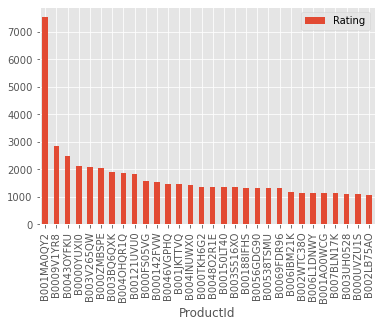

In [5]:
most_popular.head(30).plot(kind = "bar")

## Analysis:

The above graph gives us the most popular products (arranged in descending order) sold by the business.

For eaxmple, product, ID # B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YR8 has sales of 3000, etc.

## Recommendation System - Part II


### Model-based collaborative filtering system
1)Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.

2)A model based collaborative filtering technique is closen here as it helps in making the prediction of products for a particular user by identifying patterns based on preferences from multiple user data.

### Utility Matrix based on products sold and user reviews

### Utility Matrix : 
An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparse as none of the users would buy all the items in the list, hence, most of the values are unknown.

In [6]:
# Subset of Amazon Ratings

amazon_ratings1 = amazon_ratings.head(10000)

In [39]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', 
                                                     columns='ProductId', fill_value=0)
ratings_utility_matrix.head(30)

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,130414674X,1304168522,1304174778,1304174867,1304174905,1304196046,1304196062,1304196070,1304196135,1304351475,1304482596,1304482634,1304482685,1304488608,1304495396,1304511073,1304511081,1304511111,130451112X,1304511138,1304511146,1304511154,1304622193,1304622223,1304622428,1304622452,1304622460,1304622622,1304622657,1304622665,1304624498,1304624544,1304651029,1304651088,130465110X,1304651118,1304651347,1304665704,1304665720,130466578X,1403790965,1412759676,1451646526,1457982633,1572671203,1879187396,1906987238,1929099886,1987958179,3222000565,322700075X,3227001055,3227001381,3292000971,3423470476,360211600X,4057362797,4057362843,4057362886,4057362894,4057362967,4057363823,4057368825,4057553908,5297000963,5357954771,535795531X,535795545X,5357955743,5357955751,5357955786,5357955832,5357955867,5357955905,5357955948,5357955972,5357956014,5357956111,5357956227,6022600685,602260074X,6022600790,6022600804,6022600812,6040652705,6041134473,604113449X,6041134511,6053640972,6117036094,6117043058,6152000416,6162071103,6162751473,6165151329,6165290582,6167061580,6169040335,6175005570,6175005589,711901871X,7535842801,753865058X,7539914718,7800558258,7806397051,7842953384,7883527428,7883633309,788522323X,7885223639,7899120217,7899123011,8072222120,8096398741,8096398768,8096399322,8279995404,8329000710,832900094X,8329001008,8430539387,8805002860,8901110814,8901134322,8934903716,897677244X,8982641262,8997092219,9029300388,9502737628,9509369934,9510213861,9511181564,9511181572,951311290X,9571044822,9573086514,9573215926,9575295714,957696718X,9601403787,9601403825,9601420347,9602344954,9602617918,9605406446,9623541902,9628982370,9740200133,9742126046,9742189889,9742496811,974383785X,9744287233,9744434139,9745340936,9745343412,974619187X,9746427962,9747842297,9748668525,9748776093,974935706X,9749377397,9749513444,9756518006,9756518081,9758086243,9759091062,9788071074,9788071139,9788071163,9788071171,978807118X,9788071198,978807121X,9788071260,9788071465,9788071511,9788071538,9788071554,9788071570,9788071597,9788071813,9788071848,9788071856,9788072097,9788072100,9788072119,9788072208,9788072216,9788072283,9788072305,9788072348,9788072372,9788072453,978807247X,9788072488,978807250X,9788072569,978807278X,9788072828,9788072895,9788072976,9788072992,978807314X,9788073239,9788073247,9788073263,978807328X,9788073328,9788073409,9788073417,9788073476,9788073484,9788073492,9788073514,9788073565,9788073840,9788073859,9788073883,9788074049,9788074286,9788074359,9788074367,9788074405,9788074421,9788074553,9788074995,9788075363,9788075509,9788075584,9788075622,9788075630,9788075649,9788075681,978807572X,9788076025,9788076203,9788077021,9788077315,9788077382,9788077625,9788077927,978807801X,9788078389,9788078885,9788078893,9788078907,978807894X,9788079067,9788079970,9788079989,9788080227,9788080278,978808043X,9788080626,9788080634,9788080669,9788080685,9788080855,9788080901,9788080928,9788081053,9789820615,978982064X,979077012X,9790770138,9790770154,9790770308,9790770391,9790770561,9790770758,9790770790,9790770839,9790770871,9790770898,9790770944,9790770995,9790771002,9790771010,9790771339,9790771347,9790771401,9790771444,9790771479,9790771517,9790771568,9790771584,9790771614,9790771762,9790771916,9790771983,9790772009,9790772238,9790772289,9790772564,9790772645,979077267X,9790773145,9790773161,9790773412,9790773455,9790773463,979077348X,9790773587,9790773609,979077365X,9790773668,9790773676,9790773730,9790773749,9790773870,9790774060,9790774389,9790774397,9790774443,9790774516,979077480X,9790774842,9790774907,9790775024,9790775156,9790775253,9790775261,9790775288,979077530X,9790775571,9790775741,9790775989,9790776098,9790776144,9790776209,9790776241,979077625X,9790776292,9790776349,9790776381,9790776403,9790776489,9790776691,9790776810,9790776942,9790776977,9790777019,9790777272,9790777396,9790777450,9790777884,9790777949,9790777981,97907782

As expected, the utility matrix obtained above is sparce, I have filled up the unknown values wth 0

In [8]:
ratings_utility_matrix.shape

(9697, 886)

Transposing the matrixm

In [10]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X.shape

(886, 9697)

Unique products in subset of data

In [12]:
X1 = X

Decomposing the Matrix

In [13]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [41]:
decomposed_matrix

array([[ 1.94452774e-15,  2.50432500e-14,  4.42364840e-14, ...,
        -8.58822053e-13,  1.85289150e-12, -8.04440199e-12],
       [-2.33712017e-14, -3.09687544e-13, -5.57836882e-13, ...,
         5.55335787e-12,  4.18726861e-12,  2.52045115e-11],
       [-1.01406265e-16,  5.68819390e-15,  9.55543207e-16, ...,
        -1.80649902e-14, -1.10244692e-13, -2.41058304e-15],
       ...,
       [ 3.49227324e-06,  2.27945065e-01, -1.04174911e-02, ...,
        -3.70765355e-03, -7.67061796e-05, -4.92290985e-02],
       [-2.16805911e-06,  9.10415413e-04,  3.11488000e-05, ...,
        -9.15311897e-04,  6.10503810e-04, -5.93784099e-03],
       [-3.89379498e-04,  4.20076919e-01,  3.59477154e-01, ...,
        -8.91837666e-03, -6.82207398e-03,  9.06419626e-01]])

Correlation Matrix

In [14]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

correlation_matrix

Isolating Product ID # 6117036094 from the Correlation Matrix
Assuming the customer buys Product ID # 6117036094 (randomly chosen)

In [15]:
X.index[99]

'6117036094'

Index # of product ID purchased by customer

In [17]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [18]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

Recommending top 10 highly correlated products in sequence¶


In [19]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['0205616461',
 '130414089X',
 '322700075X',
 '3423470476',
 '360211600X',
 '535795531X',
 '5357955751',
 '5357955832',
 '5357956227']

Product Id # Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

## Recommendation System - Part III

1)For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.

2)Dataset : Home Depot's dataset with product dataset.

In [20]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

Item to item based recommendation system based on product description
Applicable when business is setting up its E-commerce website for the first time

In [22]:
product_descriptions = pd.read_csv('C:\\Users\\RM\\Desktop\\recommendation_system\\product_descriptions.csv')
product_descriptions.shape

(124428, 2)

### Checking for missing values

In [23]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [42]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

Feature extraction from product descriptions

Converting the text in product description into numerical data for analysis

In [25]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

Visualizing product clusters in subset of data

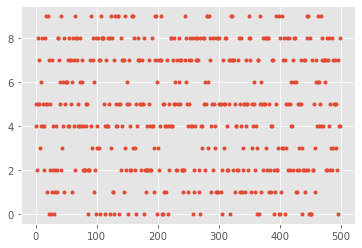

In [26]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [27]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

### Output
1)Recommendation of product based on the current product selected by user.

2)To recommend related product based on, Frequently bought together

#### Top words in each cluster based on product description

In [28]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 wall
 plate
 posts
 post
 center
 cabinet
 plated
 panels
 speaker
 steel
Cluster 1:
 cutting
 saw
 pole
 amp
 power
 steel
 blade
 volt
 compact
 20
Cluster 2:
 paint
 tape
 wood
 painted
 painting
 roller
 project
 ft
 primed
 moulding
Cluster 3:
 insulation
 fiberglass
 easy
 radiant
 attic
 vinyl
 tape
 heater
 brush
 install
Cluster 4:
 frame
 patio
 outdoor
 collection
 post
 rust
 fabric
 steel
 weather
 wood
Cluster 5:
 concrete
 ft
 use
 metal
 provides
 seal
 water
 watering
 stake
 used
Cluster 6:
 water
 air
 easy
 installation
 use
 design
 tank
 toilet
 temperature
 gas
Cluster 7:
 light
 watt
 led
 ft
 fan
 bulb
 lighting
 fixture
 bulbs
 home
Cluster 8:
 azek
 metal
 drill
 hole
 set
 trim
 plug
 tooth
 screw
 piece
Cluster 9:
 tool
 power
 dust
 features
 dry
 easy
 air
 storage
 adjustable
 filter


C:\Users\RM\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Predicting clusters based on key search words¶

In [29]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

### Keyword : 
cutting tool

In [30]:
show_recommendations("cutting tool")

Cluster 1:
 cutting
 saw
 pole
 amp
 power
 steel
 blade
 volt
 compact
 20


## Keyword : 
spray paint

In [31]:
show_recommendations("spray paint")

Cluster 2:
 paint
 tape
 wood
 painted
 painting
 roller
 project
 ft
 primed
 moulding


### Keyword : 
steel drill

In [32]:
show_recommendations("steel drill")

Cluster 8:
 azek
 metal
 drill
 hole
 set
 trim
 plug
 tooth
 screw
 piece


In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word.

### Keyword :
water

In [33]:
show_recommendations("water")

Cluster 6:
 water
 air
 easy
 installation
 use
 design
 tank
 toilet
 temperature
 gas


Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.

### Summary:
This works best if a business is setting up its e-commerce website for the first time and does not have user-item purchase/rating history to start with initally. This recommendation system will help the users get a good recommendation to start with and once the buyers have a purchased history, the recommendation engine can use the model based collaborative filtering technique.